In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

# Dogecoin Price History and Regression Models

### Add Clean Data for Dogecoin

In [2]:
dfDOGE = pd.read_csv (r'..\Data\crypto\dogecoinAll_1HR_Cleaned.csv')

In [3]:
dfDOGE.head(5)

,Unnamed: 0,rate_open,rate_high,rate_low,rate_close,Date,hour,year,month,day
0,0,0.001388,0.001388,0.001388,0.001388,2016-01-01,0,2016,1,1
1,1,0.001388,0.001388,0.001388,0.001388,2016-01-01,1,2016,1,1
2,2,0.001388,0.001388,0.001388,0.001388,2016-01-01,2,2016,1,1
3,3,0.001388,0.001388,0.001388,0.001388,2016-01-01,3,2016,1,1
4,4,0.001388,0.001388,0.001388,0.001388,2016-01-01,4,2016,1,1


### Scatter Plot of Dogecoin prices from January 2016

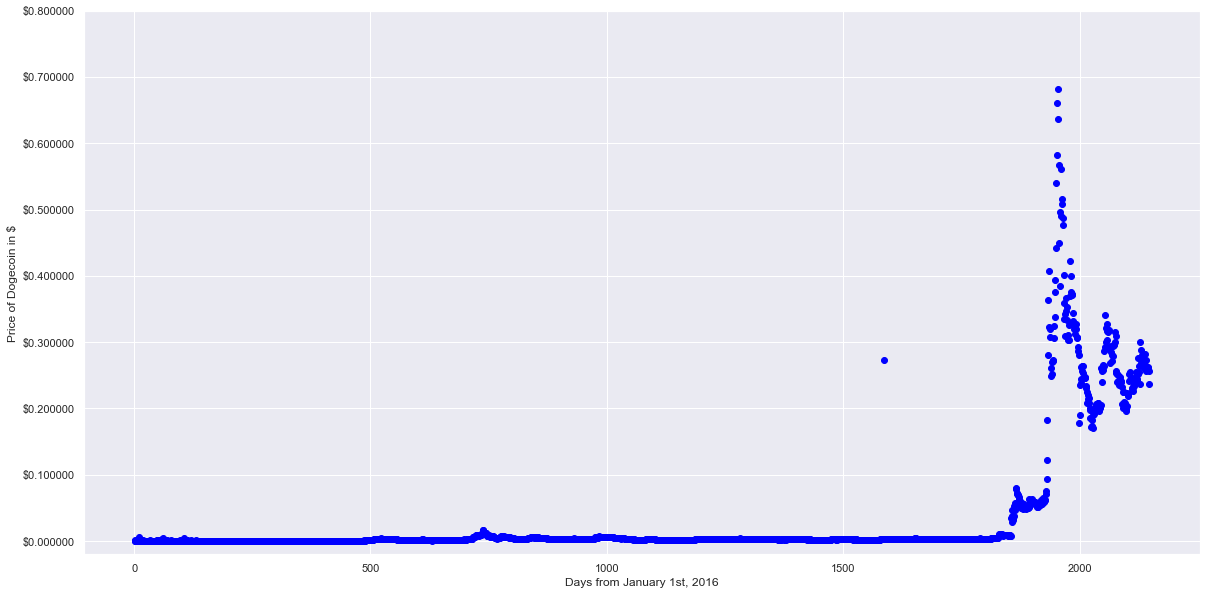

In [4]:
x = list(range(1,2148))

dfDaily = dfDOGE[dfDOGE['hour'] == 23]

fig, ax = plt.subplots(figsize=(20,10))
formatter = ticker.FormatStrFormatter('$%1.6f')
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Days from January 1st, 2016')
ax.set_ylabel('Price of Dogecoin in $')
ax.set_ylim(-0.02,0.8)
ax.scatter(x, dfDaily['rate_close'], c = 'blue')

## Linear Regression

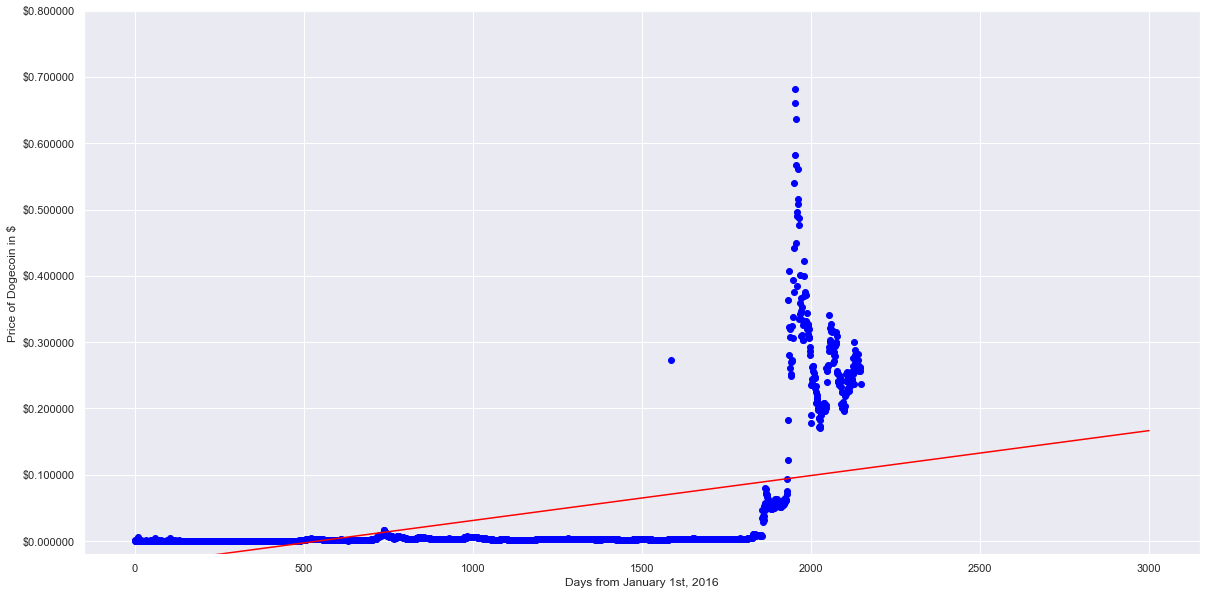

In [5]:
model2 = LinearRegression()

x = np.array(x)
y = np.array(dfDaily['rate_close'])
model2.fit(x[:, np.newaxis],y )

xfit = np.linspace(0, 3000, 3000)
yfit = model2.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots(figsize=(20,10))
formatter = ticker.FormatStrFormatter('$%1.6f')
ax.yaxis.set_major_formatter(formatter)
ax.set_ylim(-0.02,0.8)

ax.set_xlabel('Days from January 1st, 2016')
ax.set_ylabel('Price of Dogecoin in $')
ax.scatter(x, y, c = 'blue')
ax.plot(xfit, yfit, c = 'red');

## Exponential Regression

y = 2^-8.581642299049083 * 2^(0.0025554537111506163x)


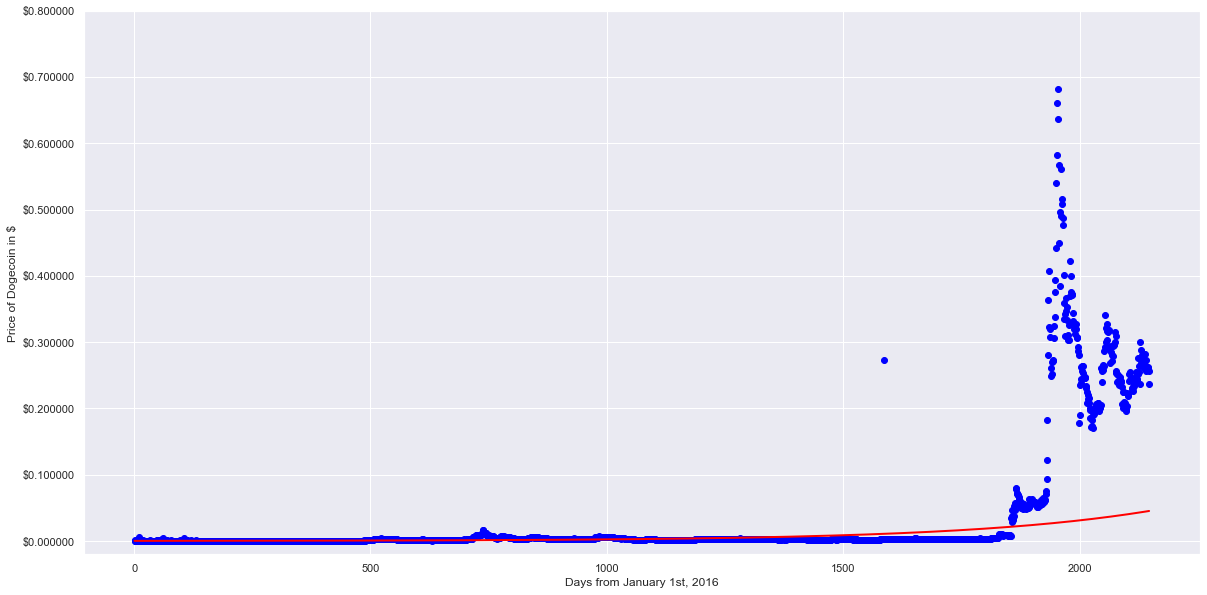

In [6]:
y_data = np.array(dfDaily['rate_close'])

log_x = np.log(x)
log_y = np.log(y_data)

curve_fit = np.polyfit(x, log_y, 1)
print("y = 2^{fit1} * 2^({fit2}x)".format( fit1 = curve_fit[1], fit2 =  curve_fit[0]))
y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x)

fig, ax = plt.subplots(figsize=(20,10))
formatter = ticker.FormatStrFormatter('$%1.6f')
ax.yaxis.set_major_formatter(formatter)
ax.set_ylim(-0.02,0.8)

ax.set_xlabel('Days from January 1st, 2016')
ax.set_ylabel('Price of Dogecoin in $')
ax.scatter(x, y_data, c = 'blue')
ax.plot(x, y, c = 'red', linewidth = 2);

## Linear Regression with Prediction

Coefficient:   6.437853564085669e-05
Mean squared error: 0.01
R-squared: 0.29


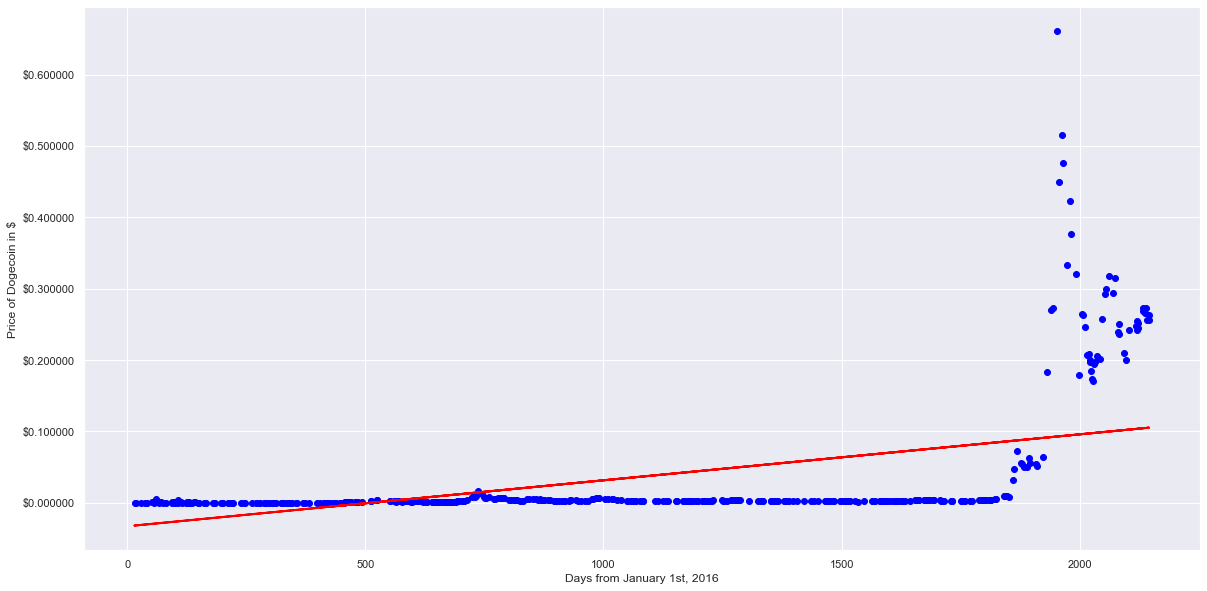

In [7]:
X_train, X_test , y_train, y_test = train_test_split(x[:, np.newaxis], y_data, train_size=0.80)

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)


print("Coefficient:  ", model2.coef_[0])
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('R-squared: %.2f' % r2_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(20,10))
formatter = ticker.FormatStrFormatter('$%1.6f')
ax.yaxis.set_major_formatter(formatter)


ax.set_xlabel('Days from January 1st, 2016')
ax.set_ylabel('Price of Dogecoin in $')
ax.scatter(X_test, y_test,  color='blue')
ax.plot(X_test, y_pred, color='red', linewidth=2);